## Problem 4

Defining the simulation procedures and settings for output:

In [1]:
using PyPlot
rc("font", size=9)
using LaTeXStrings

mutable struct Estimates{TF<:AbstractFloat, TI<:Int}
    β_h::Array{TF}
    σ_β1::Array{TF}
    σ_β2::Array{TF}
    nReplic::TI
end

function Estimates(nReplic::Int)
    β_h = zeros(nReplic)
    σ_β1 = zeros(nReplic)
    σ_β2 = zeros(nReplic)
    return Estimates(β_h, σ_β1, σ_β2, nReplic)
end

function simulate!(Est::Estimates, N::Int, T::Int)
    srand(10)
    for i = 1:Est.nReplic
        mX = randn(T, N)
        mΣ = abs.(mX)
        mU = mΣ .* randn(T, N)
        mY = mX .+ mU

        mY .= mY .- mean(mY, 1)
        mX .= mX .- mean(mX, 1)
        Est.β_h[i] = (mX[:]\mY[:])[1]

        mU_h = mY - mX * Est.β_h[i]
        Est.σ_β1[i] = sqrt((mX[:]' * mX[:])^(-2) * sum(sum(mX .* mU_h, 1).^2))
        Est.σ_β2[i] = sqrt((mX[:]' * mX[:])^(-2) * sum(mX.^2 .* mU_h.^2))
    end
end

function report_statistics(Est::Estimates)
    n = 5
    std_b = std(Est.β_h)
    bias1 = mean(Est.σ_β1)-std_b
    bias2 = mean(Est.σ_β2)-std_b
    println("standard deviation of β_h: ", round(std_b,n))
    println("bias of σ_h1: ", round(bias1,n), "   bias of σ_h2: ", round(bias2,n))
    println("standard deviation of σ_h1: ", round(std(Est.σ_β1),n), "   sd of σ_h2: ", round(std(Est.σ_β2),n))
    println("root mean squared error of σ_h1: ", round(sqrt(bias1^2+std(Est.σ_β1)^2),n), "   rmse of σ_h2: ", round(sqrt(bias2^2+std(Est.σ_β2)^2),n))
end

function plot_beta(Est::Estimates, fname::String = "no_name")
    matplotlib[:style][:use]("seaborn-whitegrid")
    fig, ax = subplots(figsize=(3.2, 3))
    ax[:hist](Est.β_h, bins = 20, label = L"$\hat{\beta}$")
    ax[:legend](loc = "upper right", frameon = true)
    tight_layout(pad = 0.1)
    savefig(string("Figure/", fname, ".pdf"))
end

function plot_sigma(Est::Estimates, fname::String = "no_name")
    matplotlib[:style][:use]("seaborn-whitegrid")
    fig, ax = subplots(figsize=(3.2, 3))
    ax[:hist](Est.σ_β1, bins = 20, alpha = 0.8, label = L"$\hat{\sigma}_\beta$")
    ax[:hist](Est.σ_β2, bins = 20, alpha = 0.8, label = L"$\tilde{\sigma}_\beta$")
    ax[:legend](loc = "upper right", frameon = true)
    tight_layout(pad = 0.1)
    savefig(string("Figure/", fname, ".pdf"))
end

plot_sigma (generic function with 2 methods)

Implement the procedures:

In [2]:
N =  1000
E1 = Estimates(N)
@time simulate!(E1, 500, 5)
report_statistics(E1)

E2 = Estimates(N)
@time simulate!(E2, 500, 10)
report_statistics(E2)

E3 = Estimates(N)
@time simulate!(E3, 500, 20)
report_statistics(E3)

  2.236926 seconds (1.17 M allocations: 460.285 MiB, 3.26% gc time)
standard deviation of β_h: 0.03513
bias of σ_h1: 0.0008   bias of σ_h2: -0.00487
standard deviation of σ_h1: 0.00213   sd of σ_h2: 0.00153
root mean squared error of σ_h1: 0.00228   rmse of σ_h2: 0.00511
  0.352750 seconds (98.01 k allocations: 733.216 MiB, 20.79% gc time)
standard deviation of β_h: 0.0254
bias of σ_h1: -0.00054   bias of σ_h2: -0.00255
standard deviation of σ_h1: 0.00121   sd of σ_h2: 0.00084
root mean squared error of σ_h1: 0.00132   rmse of σ_h2: 0.00269
  0.634078 seconds (98.01 k allocations: 1.349 GiB, 16.95% gc time)
standard deviation of β_h: 0.01716
bias of σ_h1: 0.00024   bias of σ_h2: -0.00044
standard deviation of σ_h1: 0.00071   sd of σ_h2: 0.00043
root mean squared error of σ_h1: 0.00075   rmse of σ_h2: 0.00061


Generate the plots:

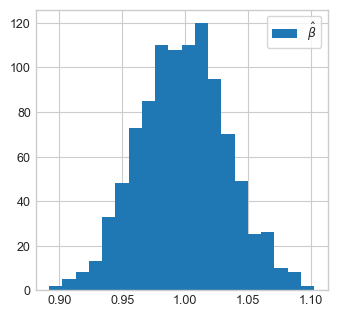

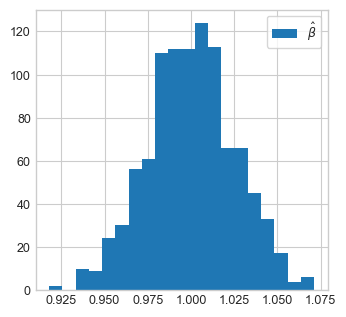

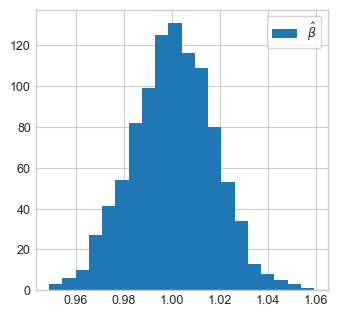

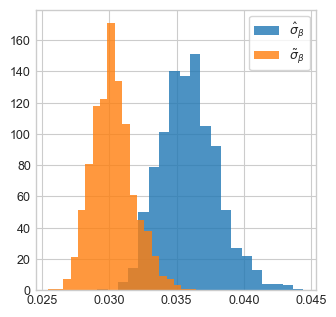

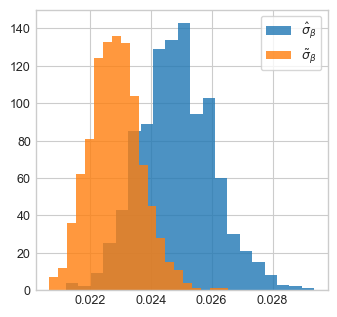

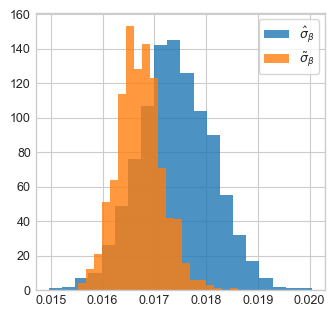

3-element Array{Void,1}:
 nothing
 nothing
 nothing

In [3]:
fname_beta = ["hist_beta5", "hist_beta10", "hist_beta20"]
fname_sigma = ["hist_sigma5", "hist_sigma10", "hist_sigma20"]
plot_beta.([E1, E2, E3], fname_beta)
plot_sigma.([E1, E2, E3], fname_sigma)